In [2]:
import kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [5]:
data = pd.read_csv('hmnist_28_28_RGB.csv')

In [6]:
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


**Understanding the data**

The dataset includes 10015 images that are 28 x 28 pixels = 784 pixels 
As they are RGB images and not gray scale they must be multipled by 3 (R, G, B). In total, there are 2352 pixels.

In [7]:
y = data['label']
X = data.drop(columns='label')/255

num_rows, num_cols = 28, 28
num_classes = len(set(y))

In [8]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: label, dtype: int64

In [10]:
y.value_counts()

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64

In [13]:
X = np.array(X)
X = X.reshape(X.shape[0], num_rows, num_cols, 3)
X[:5]

array([[[[0.75294118, 0.6       , 0.75686275],
         [0.76470588, 0.60784314, 0.75294118],
         [0.77254902, 0.60392157, 0.7254902 ],
         ...,
         [0.75686275, 0.56470588, 0.6       ],
         [0.77254902, 0.60392157, 0.63921569],
         [0.76078431, 0.59607843, 0.62745098]],

        [[0.77254902, 0.63529412, 0.79215686],
         [0.78823529, 0.62745098, 0.77254902],
         [0.79215686, 0.62745098, 0.75686275],
         ...,
         [0.76078431, 0.57647059, 0.58431373],
         [0.77647059, 0.61960784, 0.65098039],
         [0.75294118, 0.6       , 0.65490196]],

        [[0.77254902, 0.60784314, 0.75686275],
         [0.77647059, 0.60392157, 0.7254902 ],
         [0.79215686, 0.61176471, 0.74901961],
         ...,
         [0.76078431, 0.58431373, 0.59607843],
         [0.78039216, 0.63137255, 0.69411765],
         [0.76078431, 0.61176471, 0.68627451]],

        ...,

        [[0.76078431, 0.61568627, 0.74901961],
         [0.80784314, 0.67843137, 0.80784314]

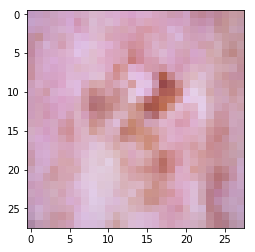

In [17]:
plt.imshow(X[0].reshape(28,28,3), cmap='brg')

In [18]:
y = np.eye(num_classes)[np.array(y.astype(int)).reshape(-1)]
# preview the one hot encoded target
y[:10]

array([[0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.]])

In [19]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(num_rows, num_cols, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [21]:
model.fit(X, y, batch_size=32, epochs=3)

Epoch 1/3
10015/10015 [==============================] - 13s 1ms/step - loss: 0.9707 - accuracy: 0.6745
Epoch 2/3
10015/10015 [==============================] - 12s 1ms/step - loss: 0.8771 - accuracy: 0.6874
Epoch 3/3
10015/10015 [==============================] - 12s 1ms/step - loss: 0.8493 - accuracy: 0.6906
